# Исследование сердечнососудистых заболеваний

In [57]:
import pandas as pd
import numpy as np
import seaborn as sb 
from pickle import dump
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

## Анализ данных

In [58]:
df_train = pd.read_csv('train.csv') # загружаем обучающую выборку
df_test = pd.read_csv('test.csv')   # загружаем тестовую выборку

In [59]:
df_test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1


In [60]:
df_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [61]:
df_train.shape

(70000, 13)

In [62]:
df_test.shape

(30000, 12)

In [63]:
df_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
df_train.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

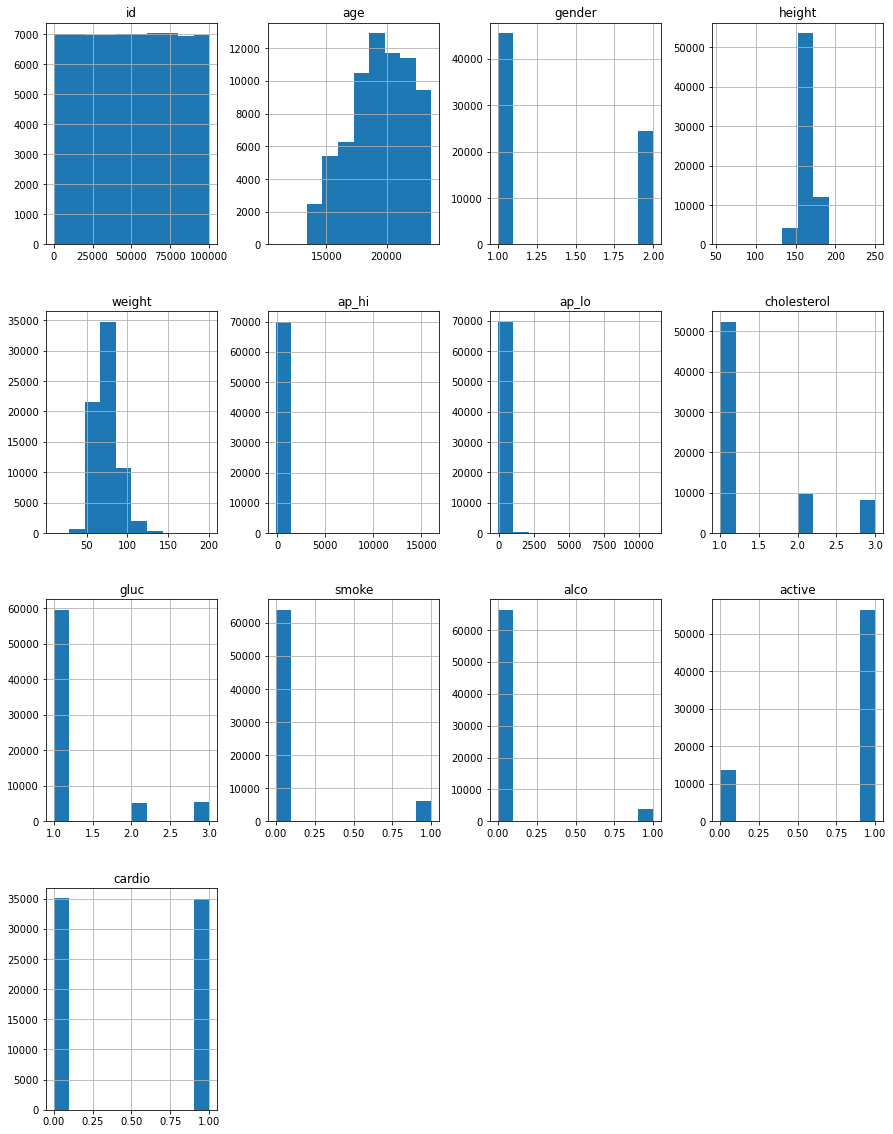

In [65]:
df_train.hist(figsize=(15, 20));

In [66]:
pd.DataFrame(round(df_train.isna().mean()*100,)).style.background_gradient('coolwarm') #  проверим пропуски

,0
id,0.000000
age,0.000000
gender,0.000000
height,0.000000
weight,0.000000
ap_hi,0.000000
ap_lo,0.000000
cholesterol,0.000000
gluc,0.000000
smoke,0.000000


In [67]:
df_train.duplicated().sum() # проверим дубликаты

0

In [68]:
df_train['id'].duplicated().sum() # дубликаты в столбце id

0

In [69]:
df_train = df_train.drop('id', axis=1) # удалим столбец id

In [70]:
df_train.duplicated().sum() # еще раз проверим на дубликаты

24

In [71]:
df_train[df_train.duplicated()].sort_values(by='age') # посмотрим действительно ли это дубликаты

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
40365,14552,1,158,64.0,120,80,1,1,0,0,1,0
64169,16160,1,168,65.0,120,80,1,1,0,0,1,1
21784,16793,1,165,68.0,120,80,1,1,0,0,1,0
60474,16805,1,157,67.0,120,80,1,1,0,0,1,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
50432,17493,2,169,74.0,120,80,1,1,0,0,1,1
56643,17535,2,165,65.0,120,80,1,1,0,0,1,0
65079,18210,1,160,60.0,120,80,1,1,0,0,1,0
42450,18353,1,169,67.0,120,80,1,1,0,0,1,0
57946,18955,1,165,75.0,120,80,1,1,0,0,1,1


Значения в столбце 'возраст' разные, значит это разные люди. Теперь разберем каждый столбец на наличие аномальных значений.

## Предобработка данных

In [72]:
df_train['age'].value_counts() # проверим значения каждого столбца поотдельности

19741    32
18236    32
20376    31
18253    31
20442    31
         ..
19277     1
16493     1
20059     1
23659     1
17926     1
Name: age, Length: 8076, dtype: int64

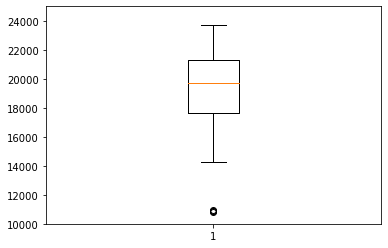

In [73]:
plt.boxplot(df_train['age'])
plt.ylim(10000,25000)
plt.show()

In [74]:
df_train.sort_values(by='age').head() # значений за усами всего 4, ими можно пренебречь

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
22343,10798,2,175,92.0,100,60,1,1,0,0,1,0
30666,10859,1,159,59.0,120,80,1,1,0,0,1,0
6219,10878,1,175,59.0,120,80,1,1,0,0,1,0
55905,10964,1,160,59.0,110,70,1,1,0,0,1,0
31762,14275,1,164,105.0,150,110,3,3,0,0,1,1


In [75]:
df_train['height'].value_counts()

165    5853
160    5022
170    4679
168    4399
164    3396
       ... 
112       1
98        1
74        1
119       1
57        1
Name: height, Length: 109, dtype: int64

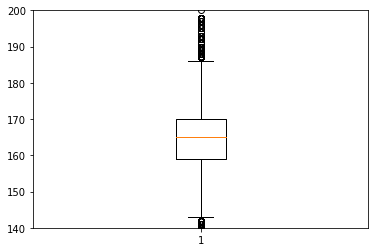

In [76]:
plt.boxplot(df_train['height'])
plt.ylim(140,200)
plt.show()

По столбцу 'рост' за пределами 'усов' осталось чуть больше 700 значений, поровну в большую и меньшую сторону.

In [77]:
df_train.loc[df_train['height'] < 145]['height'].count()

367

In [78]:
df_train.loc[df_train['height'] > 185]['height'].count()

378

In [79]:
df_train = df_train.drop(df_train.loc[df_train['height'] < 130].index).reset_index(drop = True) # удалим выбросы
df_train = df_train.drop(df_train.loc[df_train['height'] > 190].index).reset_index(drop = True)

In [80]:
df_train['weight'].value_counts()

65.0     3849
70.0     3753
68.0     2824
75.0     2736
60.0     2704
         ... 
90.7        1
121.3       1
163.0       1
64.1        1
99.9        1
Name: weight, Length: 284, dtype: int64

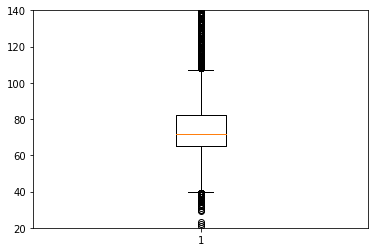

In [81]:
plt.boxplot(df_train['weight'])
plt.ylim(20,140)
plt.show()

In [82]:
df_train.loc[df_train['weight'] < 40]['weight'].count()

50

In [83]:
df_train.loc[df_train['weight'] > 110]['weight'].count()

1229

In [84]:
df_train = df_train.drop(df_train.loc[df_train['weight'] < 35].index).reset_index(drop = True) # удалим выбросы
df_train = df_train.drop(df_train.loc[df_train['weight'] > 130].index).reset_index(drop = True)

In [85]:
df_train['ap_hi'].value_counts()

 120     27592
 140      9449
 130      8914
 110      8608
 150      4417
         ...  
 1620        1
 199         1
-150         1
-115         1
 2000        1
Name: ap_hi, Length: 153, dtype: int64

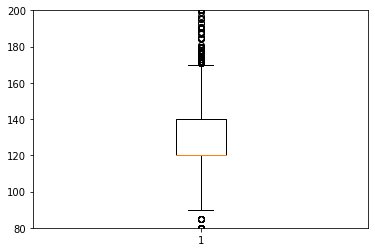

In [86]:
plt.boxplot(df_train['ap_hi'])
plt.ylim(80,200)
plt.show()

In [88]:
df_train.loc[df_train['ap_hi'] < 90]['ap_hi'].count()

319

In [89]:
df_train.loc[df_train['ap_hi'] > 170]['ap_hi'].count()

1094

In [90]:
df_train = df_train.drop(df_train.loc[df_train['ap_hi'] < 80].index).reset_index(drop = True)
df_train = df_train.drop(df_train.loc[df_train['ap_hi'] > 180].index).reset_index(drop = True)

In [91]:
df_train['ap_lo'].value_counts()

80      34583
90      14143
70      10177
100      3944
60       2699
        ...  
114         1
1002        1
111         1
1           1
602         1
Name: ap_lo, Length: 146, dtype: int64

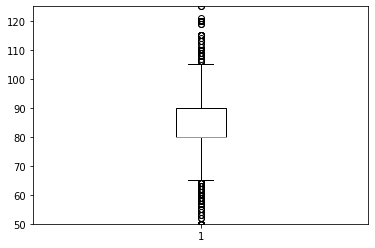

In [92]:
plt.boxplot(df_train['ap_lo'])
plt.ylim(50,125)
plt.show()

In [93]:
df_train.loc[df_train['ap_lo'] < 65]['ap_lo'].count()

2883

In [94]:
df_train.loc[df_train['ap_lo'] > 105]['ap_lo'].count()

1477

In [95]:
df_train = df_train.drop(df_train.loc[df_train['ap_lo'] < 60].index).reset_index(drop = True)
df_train = df_train.drop(df_train.loc[df_train['ap_lo'] > 110].index).reset_index(drop = True)

In [96]:
df_train['gender'].value_counts()

1    44206
2    23578
Name: gender, dtype: int64

Посмотрим на корреляцию признаков.

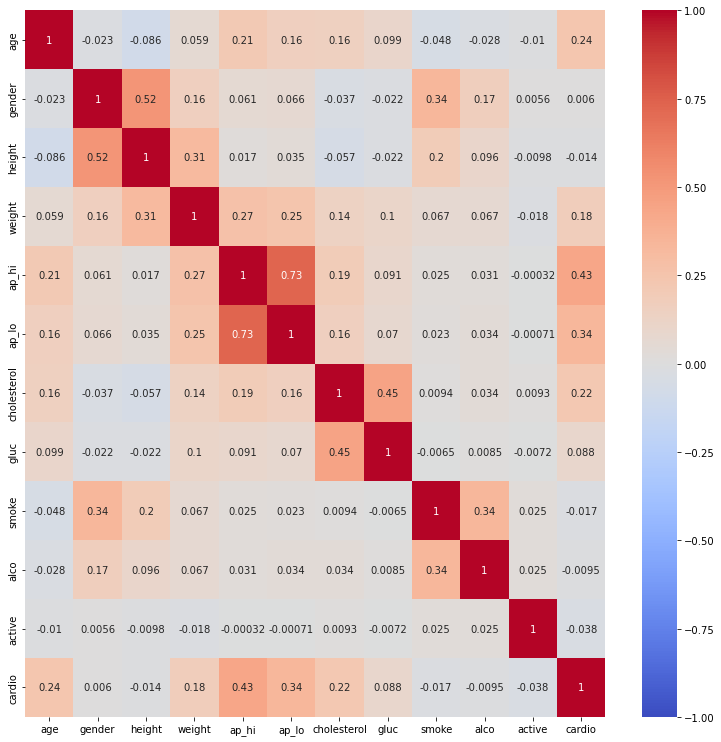

In [97]:
fig, ax = plt.subplots(figsize=(13,13)) 
sb.heatmap(df_train.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', ax = ax);

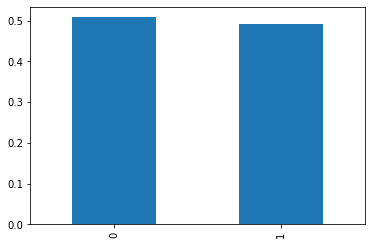

In [98]:
df_train['cardio'].value_counts(normalize= True).plot(kind='bar'); # проверим балланс классов

## Обучение моделей

In [99]:
target = df_train['cardio']    
features = df_train.drop(['cardio'], axis=1) 

In [100]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25,
                                                                     random_state=12345)

In [101]:
print(target_train.count())
print(target_valid.count())

50838
16946


In [102]:
def auc_roc_graph(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')    # функция строит графики ROC-кривой
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

In [103]:
def model_check(model, features_valid, target_valid):
    probabilities_valid = model.predict_proba(features_valid) 
    predict_valid = model.predict(features_valid)
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_valid[:, 1])   # функция вычисляет метрику auc_roc
    auc_roc_graph(fpr, tpr)
    auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
    return auc_roc

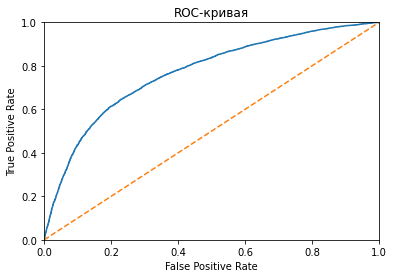

0.7684499165564825


In [104]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
auc_roc = model_check(model, features_valid, target_valid)
print(auc_roc)

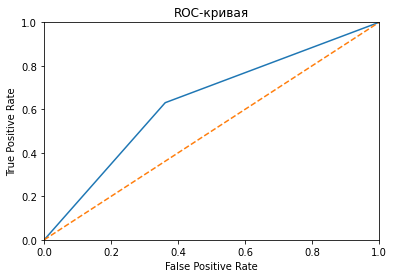

0.634573989966714


In [105]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
auc_roc = model_check(model, features_valid, target_valid) 
print(auc_roc)

In [49]:
%%time
auc_roc_best=0                                      # подбор лучших гиперпараметров
for est in range(1, 201, 1):
    for depth in range(1, 25, 1):
        model = RandomForestClassifier(n_estimators=est, 
        max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        probabilities_valid = model.predict_proba(features_valid) 
        predict_valid = model.predict(features_valid)
        fpr, tpr, thresholds = roc_curve(target_valid, probabilities_valid[:, 1])
        auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
        if auc_roc > auc_roc_best:
            best_model = model
            auc_roc_best = auc_roc
            best_est = est
            best_depth = depth
        print(f'auc_roc_best:{auc_roc_best}, auc_roc:{auc_roc}, est:{est}, depth:{depth}')
auc_roc_graph(fpr, tpr)                
print(best_model)
print(auc_roc_best)
print(best_est)
print(best_depth)

## Тестирование модели

In [52]:
df = pd.DataFrame() # создадим датафрейм с id пациента и вероятностью заболевания для него
df['id'] = df_test['id']
df_test = df_test.drop('id', axis=1) # удалим столбец id поскольку он не информативен для предсказания

In [53]:
probabilities = best_model.predict_proba(df_test) # рассчитаем вероятность для тестовой выборки

In [54]:
probabilities[:,1] # отбираем только стобец, который указывает на то, что заболевание прогнозируется

array([0.52177609, 0.56944809, 0.39314349, ..., 0.47163892, 0.33450967,
       0.64882929])

In [55]:
df['cardio'] = pd.DataFrame(probabilities[:,1]) # добавляем эти значения в созданный ранее датафрейм с результатами
df.to_csv('result.csv', index=False) # создаем файл csv с результатами

## Создание приложения для определения рисков

In [56]:
with open('model.pcl','wb') as fid: # сохраняем модель в файл, чтобы загрузить ее через streamlit.
    dump(best_model, fid)